# Analise de Credito

# Este projeto é separado em 3 etapas.

>> Etapa 1 = exploração e limpeza de dados


>> Etapa 2 = preparação de dados


>> Etapa 3 = implantação do modelo


>> Etapa 4 = comunicação dos resultados.

# Etapa 1 Exploração e limpeza de dados

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Importando os pacotes.

In [24]:
df = pd.read_csv('demo01.csv')
df.head()

print("\nTaxa de inadimplentes:")
print(df['mau'].mean())



Taxa de inadimplentes:
0.023423423423423424


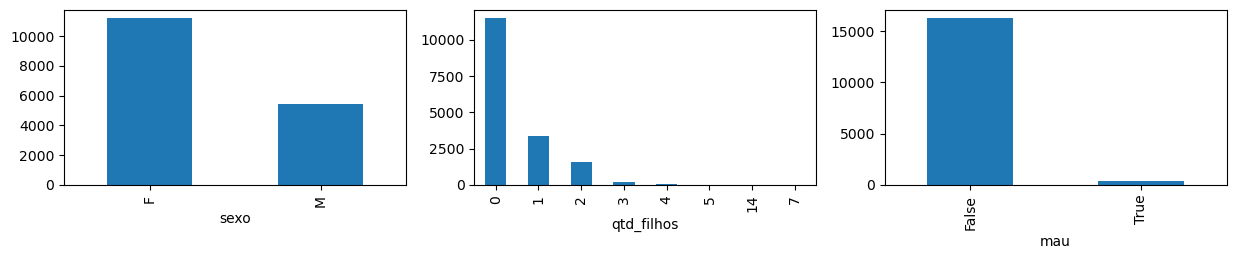

In [25]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(2, 3, 1,)
ax1 = fig.add_subplot(2,3,2)
ax2 = fig.add_subplot(2,3,3)
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar(ax=ax2)
var = 'sexo'
grafico_barras = df[var].value_counts().plot.bar(ax=ax)
var = 'qtd_filhos'
grafico_barras = df[var].value_counts().plot.bar(ax=ax1)
plt.show(ax)


In [26]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df
    
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [27]:
demo = pd.read_csv('demo01.csv')

demo.info
demo.shape

cont = demo['mau'].value_counts()
bom = cont.values[0]
mau = cont.values[1]

total = bom + mau
total

db1= (mau / total) * 100
db2= (bom/ total) * 100
print("mau=",db1,
      "bom=",db2)

mau= 2.3423423423423424 bom= 97.65765765765767


# Etapa 2 Preparação de dados

In [36]:


demod1 = demo.drop(columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

demod1.sexo.unique()
demod1.dropna()
demod1.sexo = demod1.sexo.map({'M': 1, 'F':0})
demod1.posse_de_veiculo = demod1.posse_de_veiculo.map({'Y': 1, 'N':0})
demod1.posse_de_imovel = demod1.posse_de_imovel.map({'Y': 1, 'N':0})
# dumm = sexo, posse_de_veiculo posse_de_imovel

#jogar fora =  tipo_renda educacao estado_civil tipo_residencia

demod1.head()



,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,1,1,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False
3,1,1,1,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,1,0,0,29.230137,3.021918,1,0,0,0,2.0,False


# Verificando a tabela que tem mais "peso"

In [38]:
tabelacrus = pd.crosstab(demod1['possui_email'], ['posse_de_veiculo'])
tabelabos = pd.crosstab(demod1['possui_email'],['mau'])
tabelabot = pd.crosstab(demod1['posse_de_veiculo'],['mau'])

print(tabelabos)
print(tabelabot)
#verificando qual variavel é mais "pesada"

col_0           mau
possui_email       
0             15170
1              1480
col_0               mau
posse_de_veiculo       
0                 10178
1                  6472


# Etapa 3 Implantaçao do modelo

<Figure size 2500x1000 with 0 Axes>

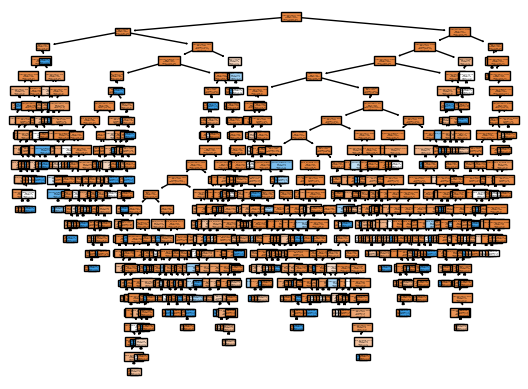

<Figure size 2500x1000 with 0 Axes>

In [64]:

demod = demod1
demod.head()
trinta , setenta = train_test_split(demod, test_size=0.70, random_state=100)

clf = DecisionTreeClassifier(random_state=100)


xs= setenta.drop(columns=['mau'])
ys= setenta[['mau']].to_numpy()

xt = trinta.drop(columns=['mau'])
yt = trinta[['mau']].to_numpy()


clf = clf.fit(xs,ys)

plot_tree(clf,filled=True, class_names=['bom', 'mau'], feature_names= xs.columns);
plt.figure(figsize=(25,10))



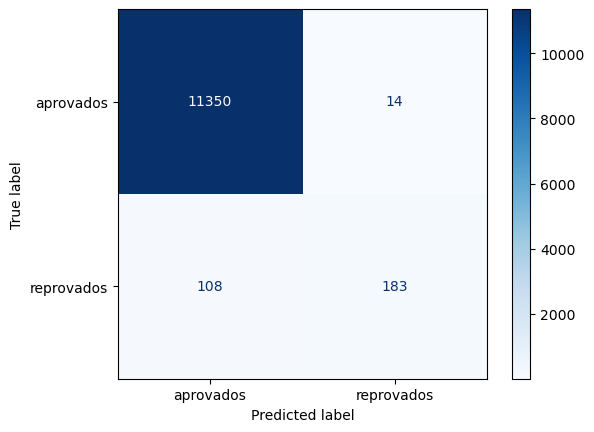

In [57]:
y_pred = clf.predict(xs)

# Criar a matriz de confusão
cm = confusion_matrix(ys, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

#plt.title("Matriz de Confusão")
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [59]:
treino = accuracy_score(ys, y_pred)
treino

0.9895323895323895

>Base de modelo na base de testes

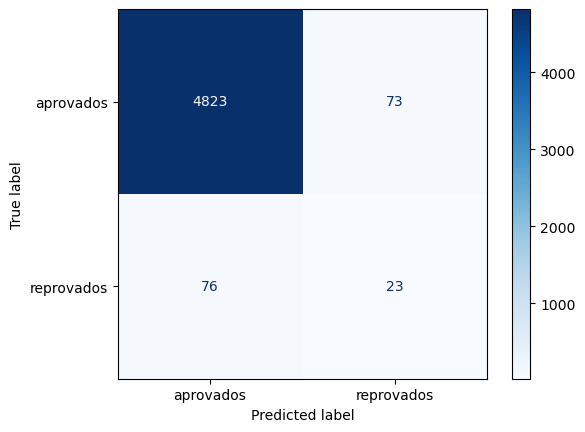

0.9701701701701702


In [95]:
previsoes = clf.predict(xt)
previsoes

cm = confusion_matrix(yt, previsoes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
acc = accuracy_score(yt, previsoes)
print(acc)


In [89]:
y_predt = clf.predict(xt)
testes = accuracy_score(yt, y_predt)
testes = round(testes, 2)
treino = round(treino, 2)
print(f'base de treino deve {treino} de acuracia, enquanto a base de testes teve {testes} de acuracia.')

base de treino deve 0.99 de acuracia, enquanto a base de testes teve 0.97 de acuracia.


# Testes com uma arvore podada.

<Figure size 2500x1000 with 0 Axes>

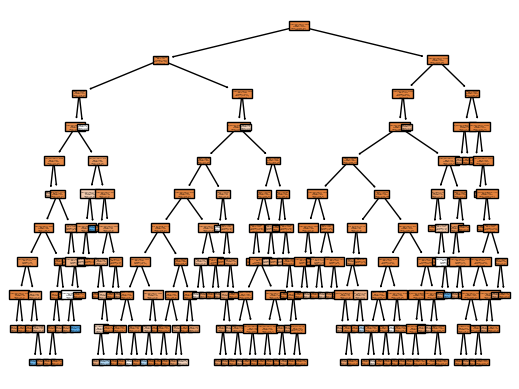

<Figure size 2500x1000 with 0 Axes>

In [77]:

clt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

clt.fit(xs,ys)

plot_tree(clt,filled=True, class_names=['bom', 'mau'], feature_names= xs.columns);
plt.figure(figsize=(25,10))


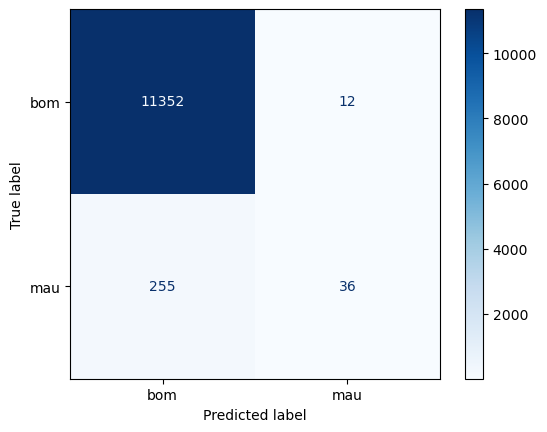

In [79]:
previsoes = clt.predict(xs)

ct = confusion_matrix(ys, previsoes)

disp = ConfusionMatrixDisplay(confusion_matrix=ct, display_labels=['bom', 'mau'])
disp.plot(cmap=plt.cm.Blues)

plt.show()


# Etapa 4 Comunicação de resultados

In [102]:
previ = clf.predict(xs)
acc2 = accuracy_score(ys, previ)
TN, FP, FN, TP = ct.ravel()  

prop = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"Proporção de proponentes classificados como 'maus': {prop:.2%}")



Proporção de proponentes classificados como 'maus': 12.37%


In [104]:
#acuracia do modelo.
total_amos= len(ys)

num_bom = np.sum(ys==0)

acu= num_bom / total_amos

print(acu)

0.975032175032175


In [106]:
acuracia_treinosetenta = treino
acuracia_testestrinta = acc
acuracia_teste2= acc2
print(f'acuracia da base de treino com a arvore nao podada:{acuracia_treinosetenta:.2%}')
print(f'acuracia da base de testes com a arvora nao podada:{acuracia_testestrinta:.2%}')
print(f'acuracia da base de testes com poda. {acuracia_teste2:.2%}')

acuracia da base de treino com a arvore nao podada:99.00%
acuracia da base de testes com a arvora nao podada:97.02%
acuracia da base de testes com poda. 98.95%
